# Import Statements and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

%matplotlib inline

In [2]:
train_y = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/train_2016_v2.csv', 
                    parse_dates=["transactiondate"])

test_y = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/train_2017.csv')

train_props = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/props_2016.csv')
test_props = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/props_2017.csv')

# Data Understanding

In [3]:
print("Training Set Size:", train_y.shape)
print("Property (2016) Set Size:", train_props.shape)

Training Set Size: (90275, 3)
Property (2016) Set Size: (9999, 58)


In [4]:
train_props.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


In [5]:
train_props.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.999000e+03,2802.000000,0.0,8.000000,9999.000000,9999.000000,61.000000,8685.000000,9616.000000,74.0,...,9897.000000,915.000000,0.0,9.790000e+03,9.842000e+03,9999.000000,9.812000e+03,9925.000000,244.000000,9.702000e+03
mean,1.252630e+07,1.017131,NaN,534.500000,2.138014,3.067707,3.770492,5.916062,2.223170,66.0,...,1957.433869,1.371585,NaN,1.601743e+05,3.909692e+05,2014.999300,2.323494e+05,5052.175427,13.844262,6.044639e+13
std,3.205463e+06,0.453153,NaN,212.717116,1.124080,1.314482,0.496435,1.728584,1.060449,0.0,...,21.947895,0.499081,NaN,2.770741e+05,6.762267e+05,0.026451,4.514329e+05,8311.246009,1.653133,2.186742e+11
min,1.071722e+07,1.000000,NaN,216.000000,0.000000,0.000000,2.000000,1.000000,1.000000,66.0,...,1885.000000,1.000000,NaN,5.000000e+00,9.000000e+00,2014.000000,4.000000e+00,19.070000,7.000000,6.037101e+13
25%,1.145614e+07,1.000000,NaN,443.000000,1.000000,2.000000,4.000000,4.000000,2.000000,66.0,...,1946.000000,1.000000,NaN,7.134175e+04,1.599235e+05,2015.000000,6.261800e+04,2255.130000,14.000000,6.037263e+13
50%,1.211635e+07,1.000000,NaN,577.500000,2.000000,3.000000,4.000000,7.000000,2.000000,66.0,...,1955.000000,1.000000,NaN,1.160270e+05,2.783050e+05,2015.000000,1.481010e+05,3699.990000,14.000000,6.037482e+13
75%,1.271249e+07,1.000000,NaN,671.250000,3.000000,4.000000,4.000000,7.000000,3.000000,66.0,...,1974.000000,2.000000,NaN,1.840435e+05,4.428485e+05,2015.000000,2.759475e+05,5725.120000,15.000000,6.037621e+13
max,1.631873e+08,13.000000,NaN,782.000000,12.000000,12.000000,5.000000,12.000000,12.000000,66.0,...,2014.000000,4.000000,NaN,1.311502e+07,2.971371e+07,2015.000000,2.210127e+07,362406.910000,15.000000,6.111009e+13


In [6]:
# Check data types
data_types = train_props.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in train_props.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {train_props[column].nunique()}")
    print(f" - Sample Values: {train_props[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: parcelid
 - Data Type: int64
 - Number of Unique Values: 9999
 - Sample Values: [10754147 10759547 10843547 10859147 10879947]

Column: airconditioningtypeid
 - Data Type: float64
 - Number of Unique Values: 2
 - Sample Values: [ 1. 13.]

Column: architecturalstyletypeid
 - Data Type: float64
 - Number of Unique Values: 0
 - Sample Values: []

Column: basementsqft
 - Data Type: float64
 - Number of Unique Values: 8
 - Sample Values: [216. 555. 224. 782. 651.]

Column: bathroomcnt
 - Data Type: float64
 - Number of Unique Values: 19
 - Sample Values: [0. 2. 4. 3. 1.]

Column: bedroomcnt
 - Data Type: float64
 - Number of Unique Values: 13
 - Sample Values: [0. 4. 5. 2. 3.]

Column: buildingclasstypeid
 - Data Type: float64
 - Number of Unique Values: 4
 - Sample Values: [3. 4. 5. 2.]

Column: buildingqualitytypeid
 - Data Type: float64
 - Number of Unique Values: 6
 - Sample Values: [ 7.  4. 10.  1. 12.]

Column: calculatedbathnbr
 - Data T

In [7]:
# Let's look at the training set
train_y.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [8]:
# merging train and properties datasets
train_df= train_y.merge(train_props, how = 'left', on = 'parcelid')
test_df = test_props.copy()
print('Final Dataset Size: ',train_df.shape)
train_df.head()

Final Dataset Size:  (90275, 60)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization

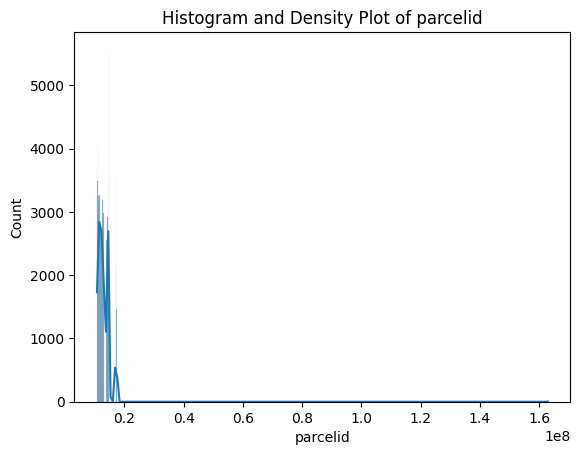

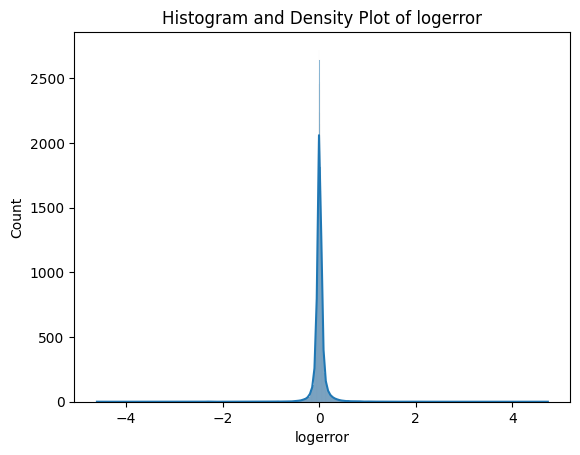

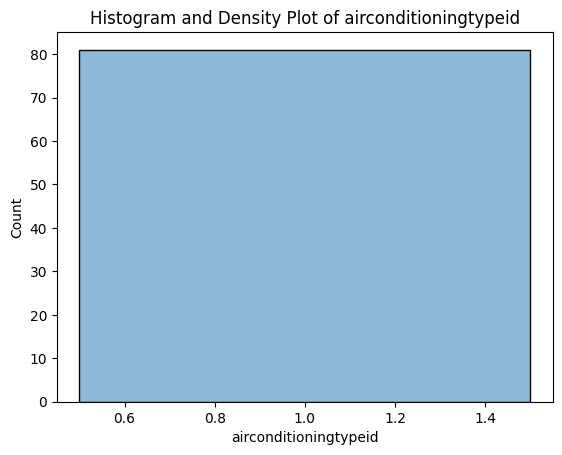

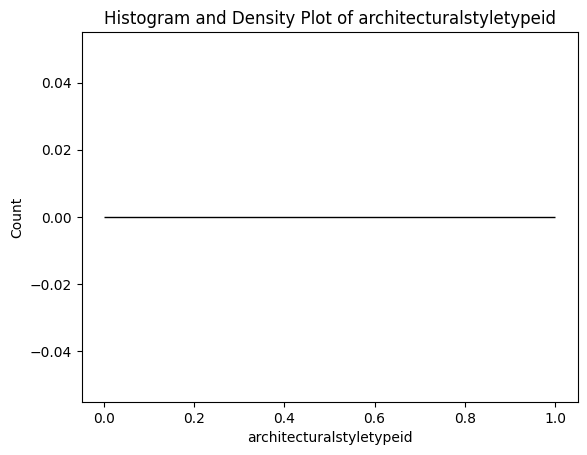

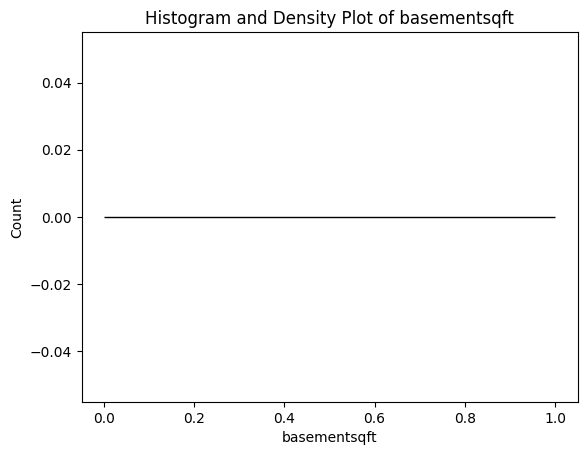

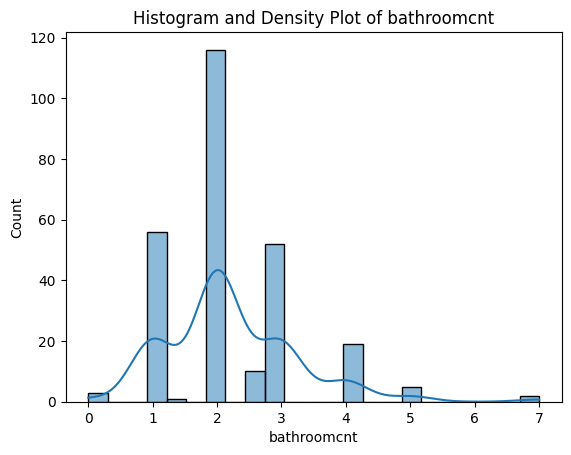

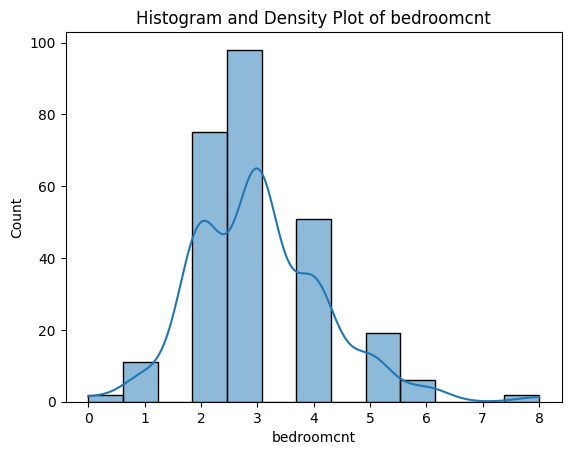

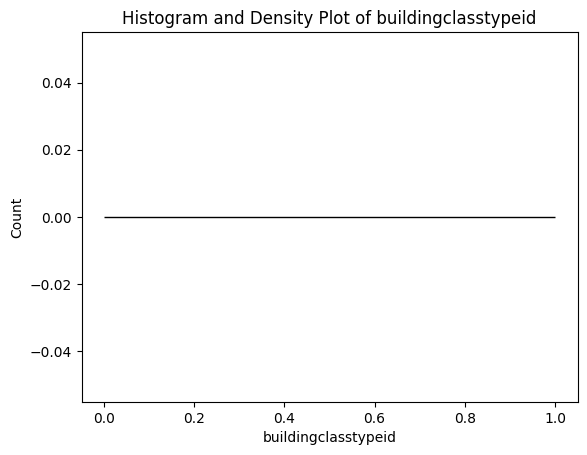

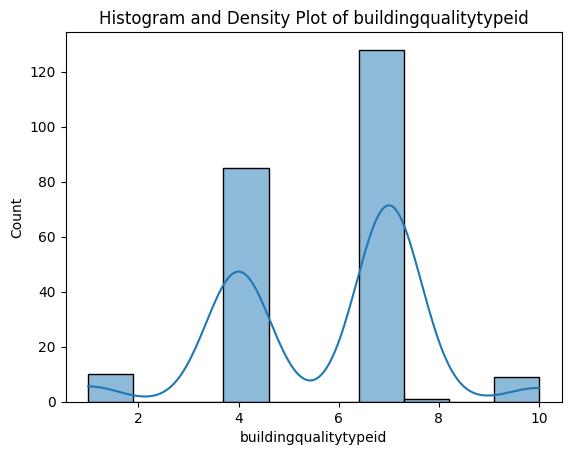

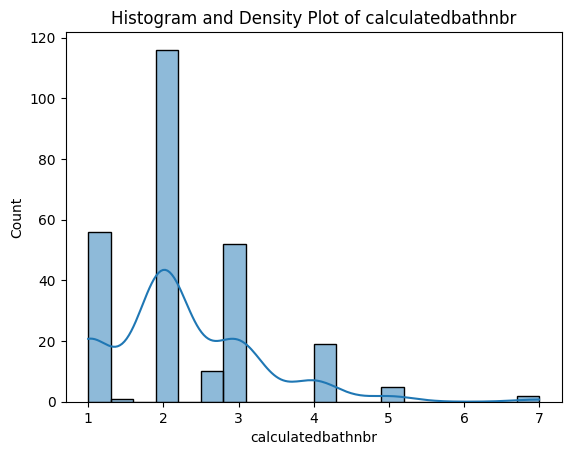

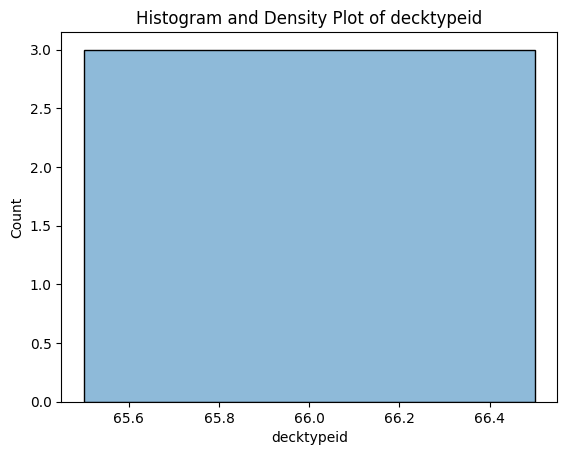

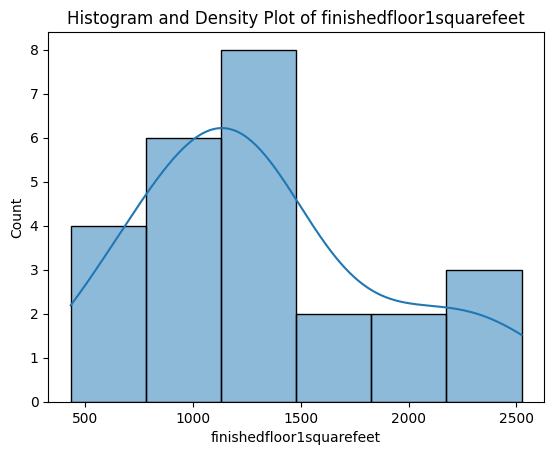

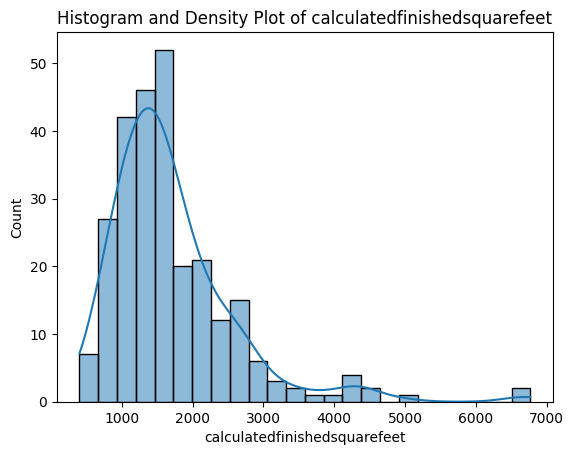

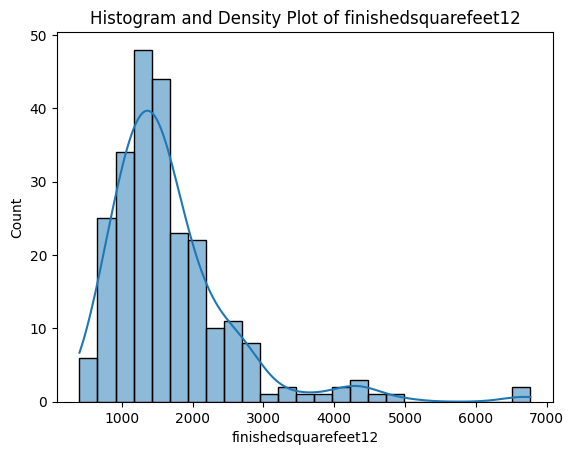

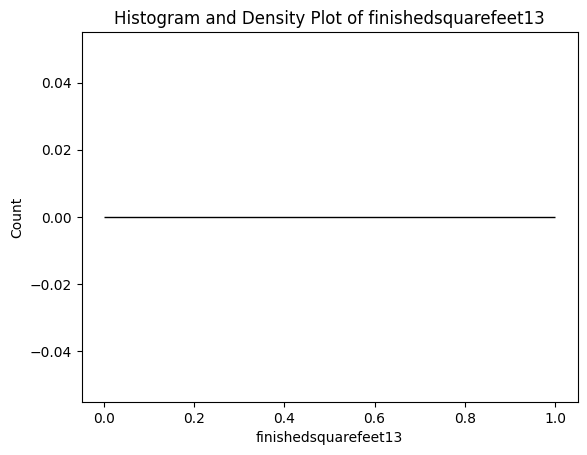

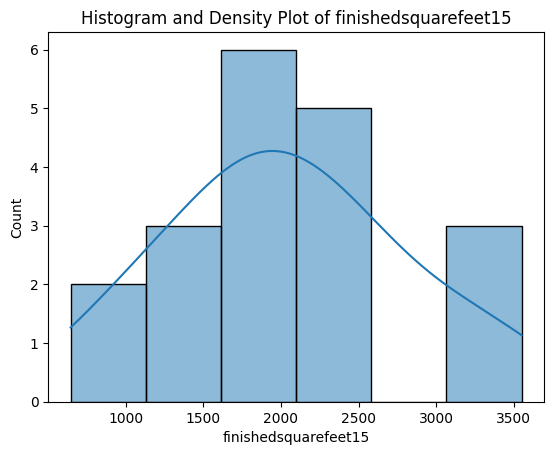

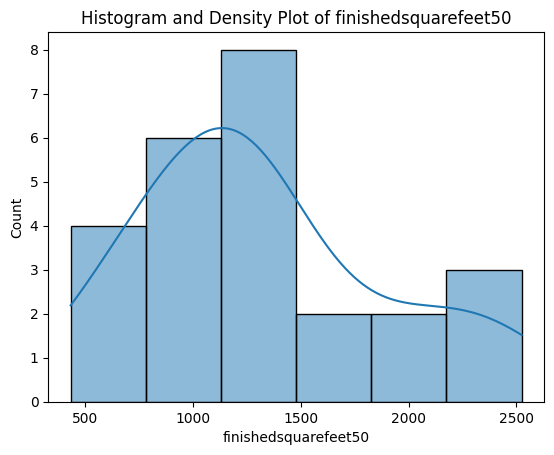

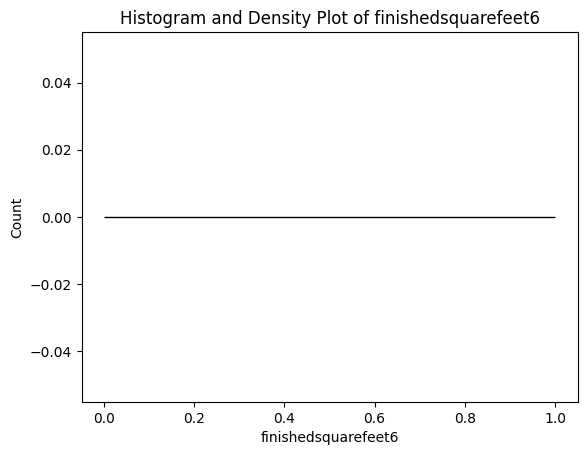

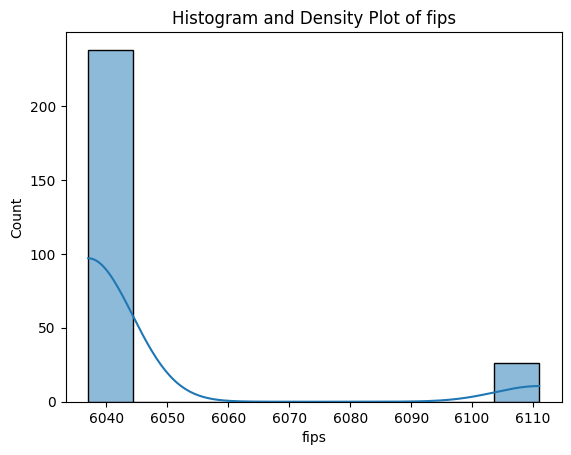

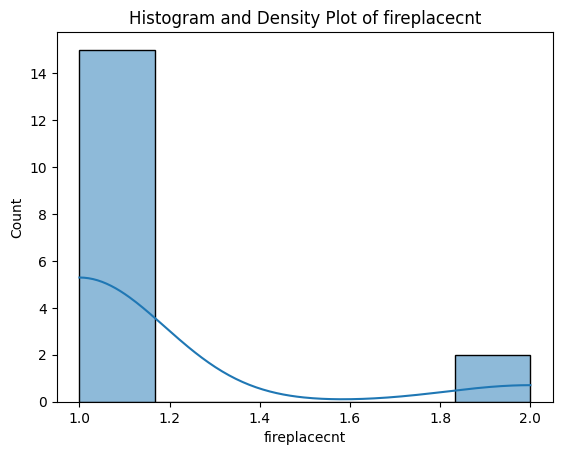

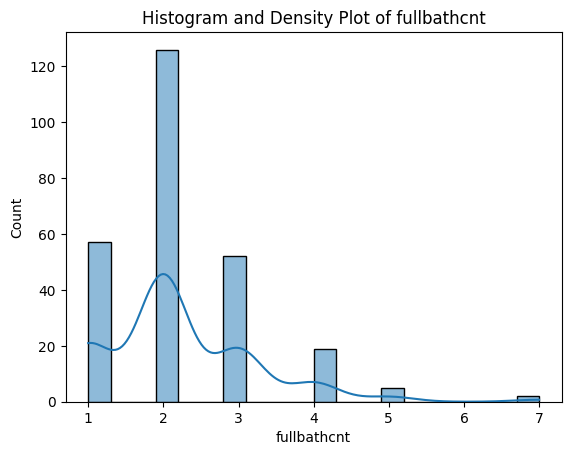

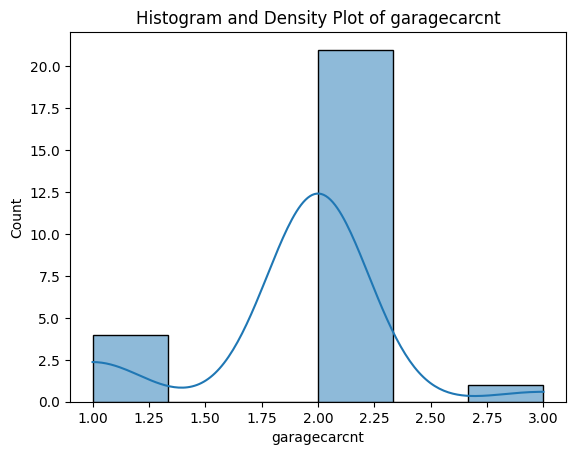

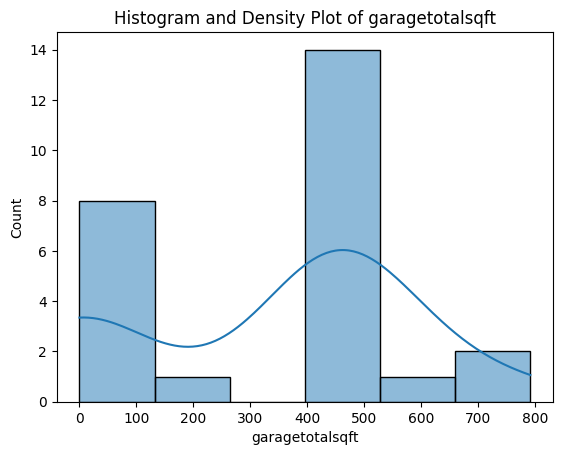

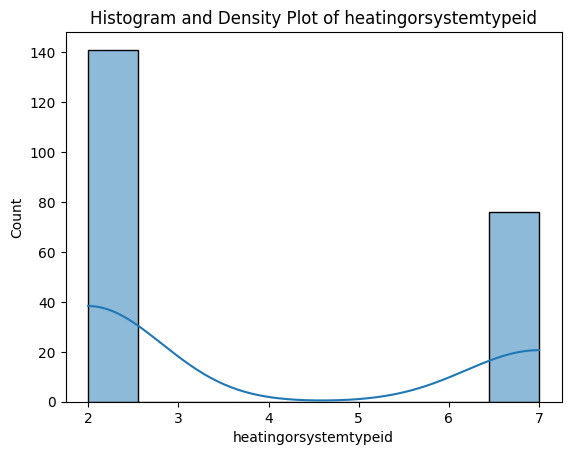

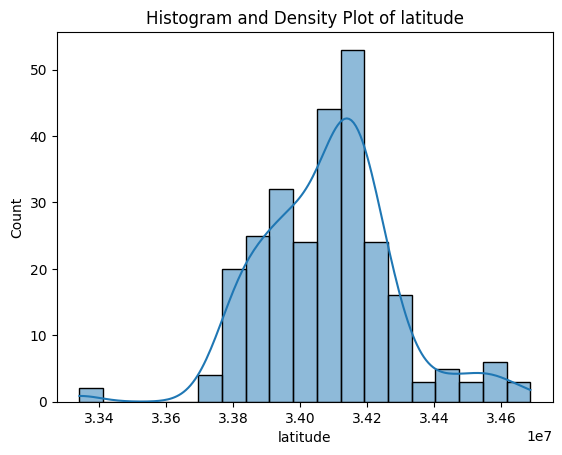

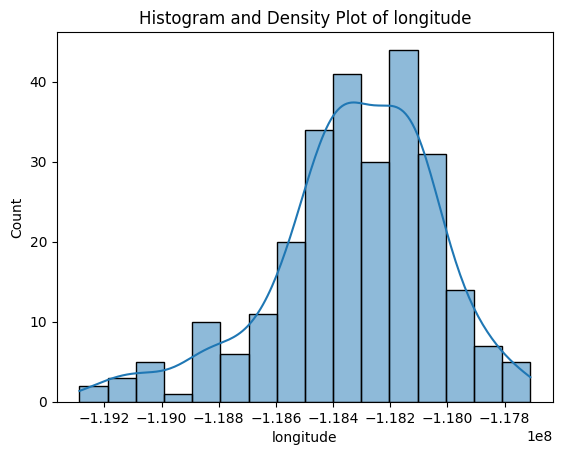

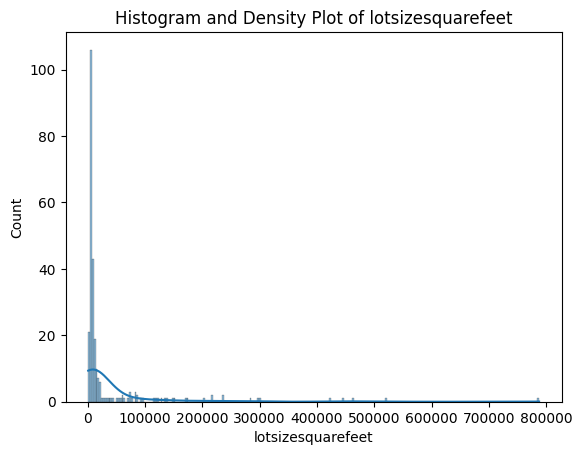

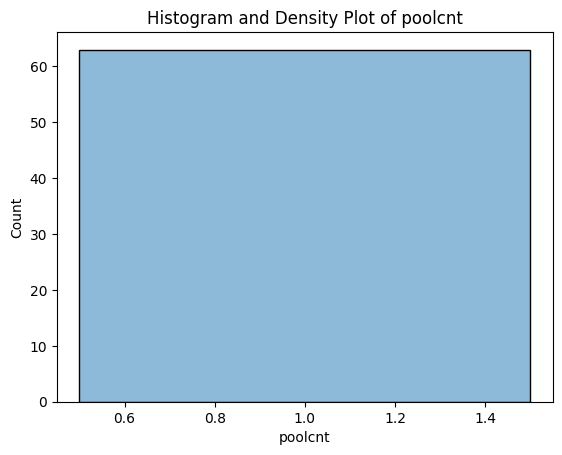

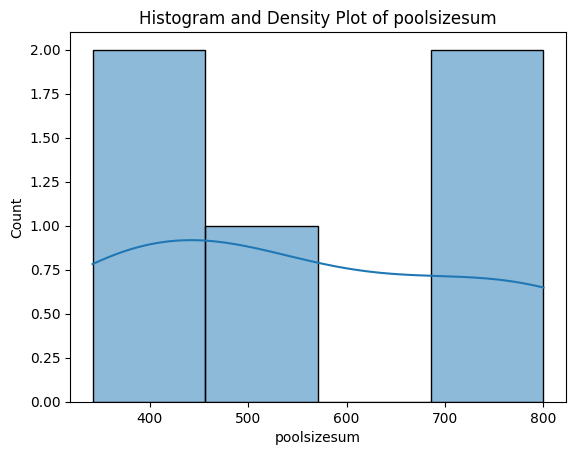

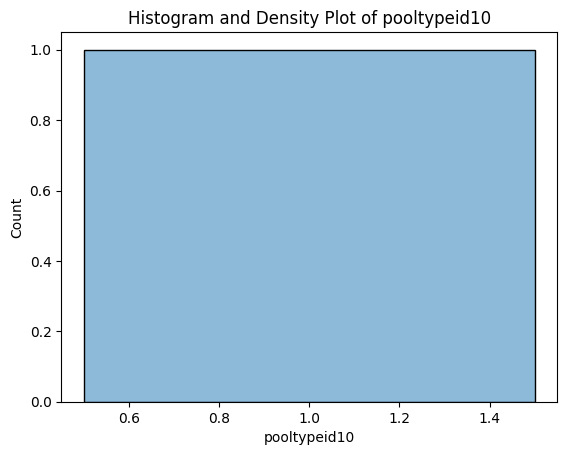

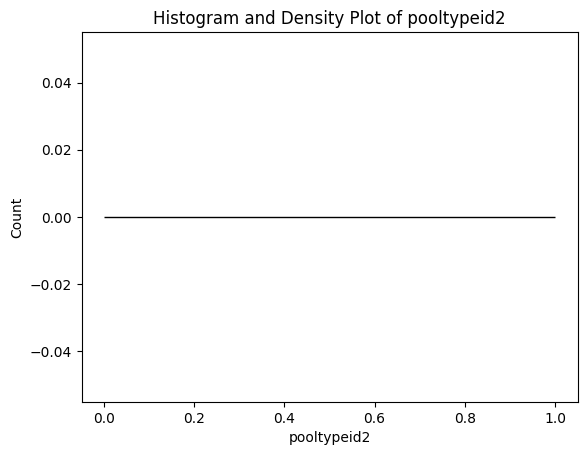

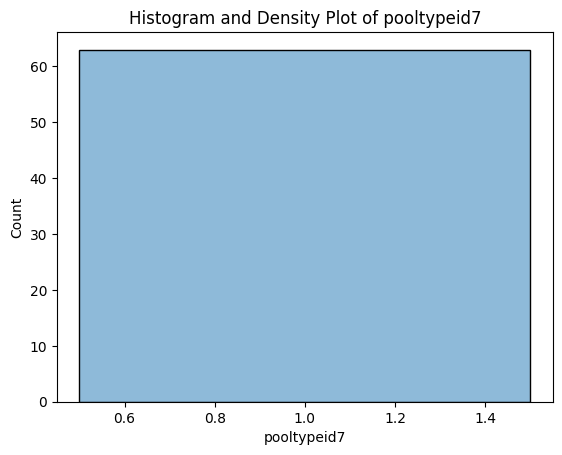

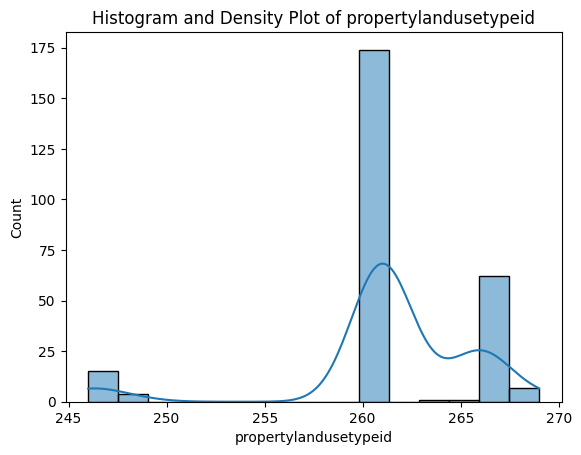

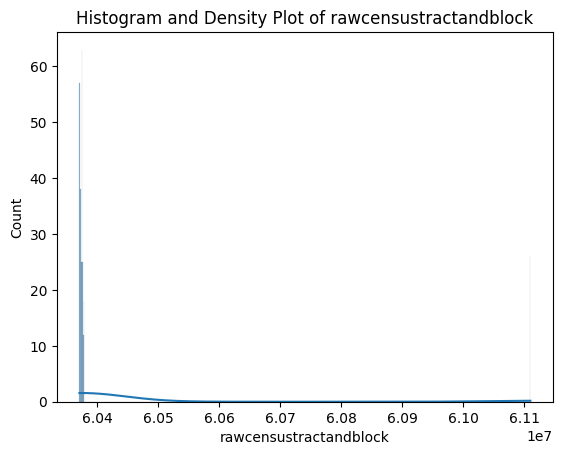

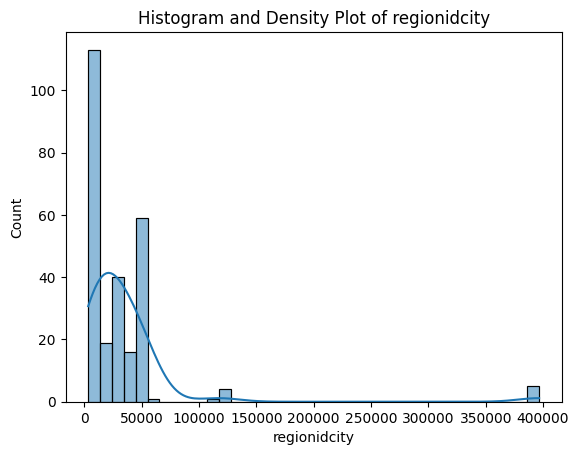

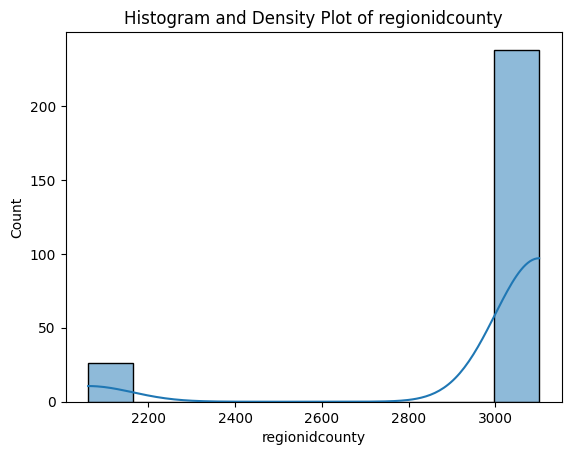

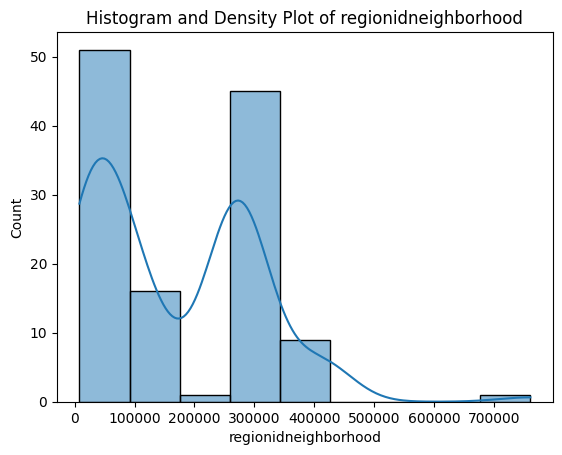

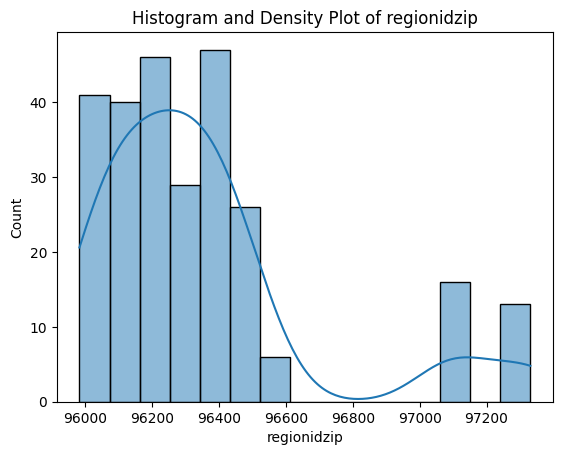

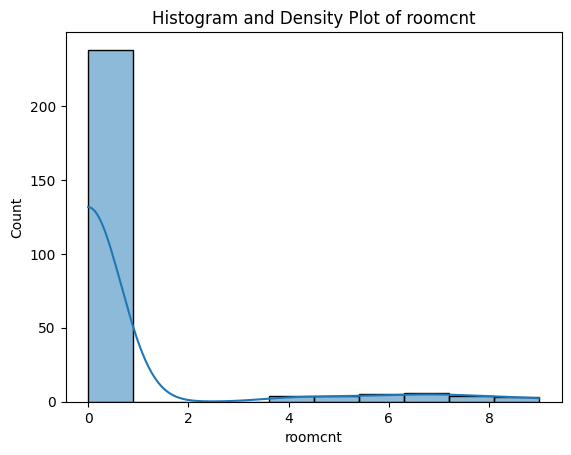

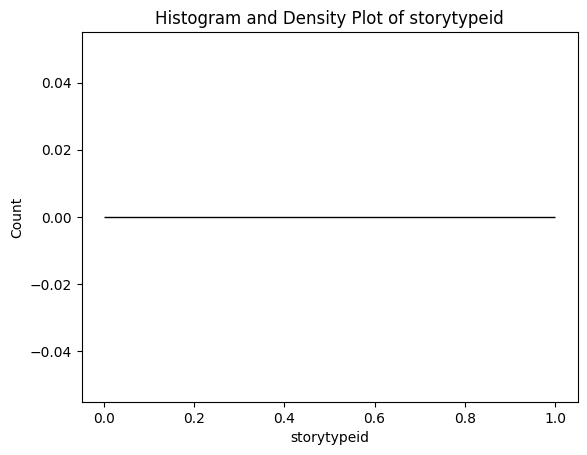

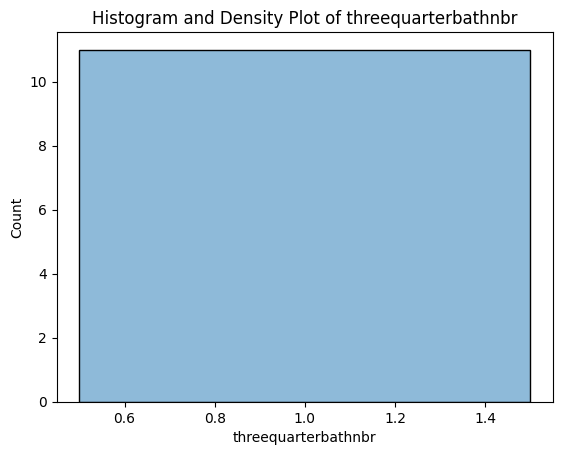

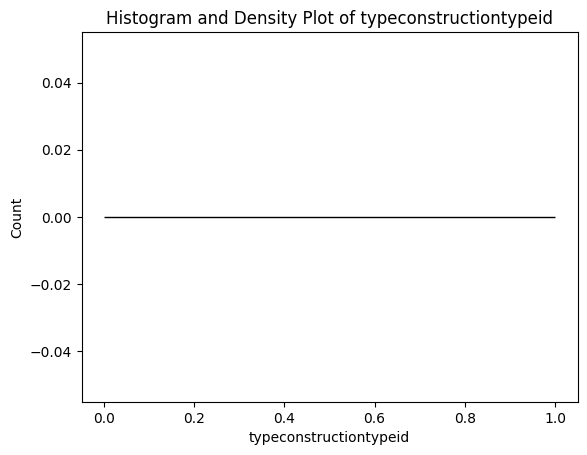

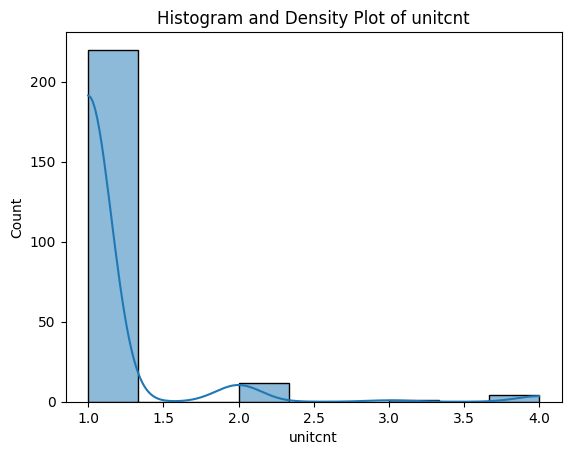

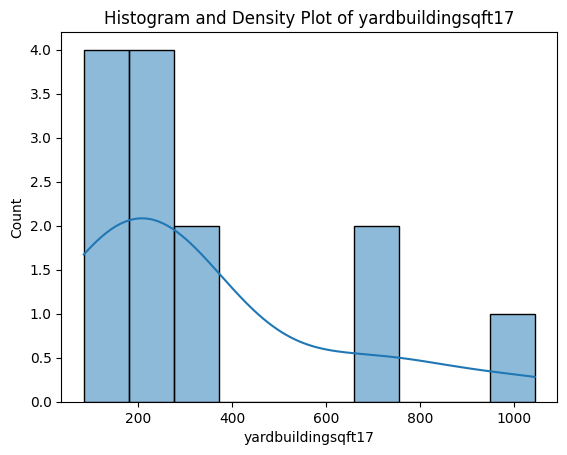

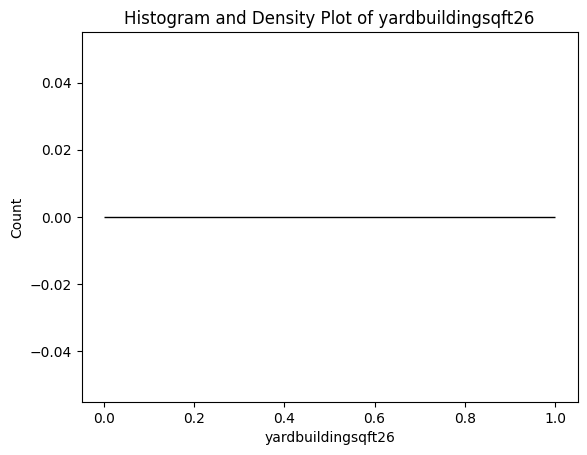

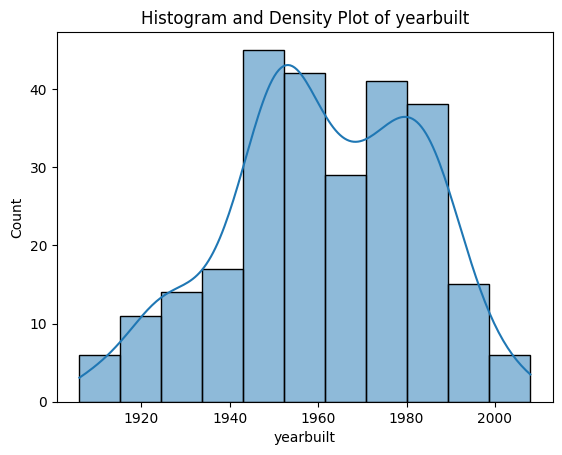

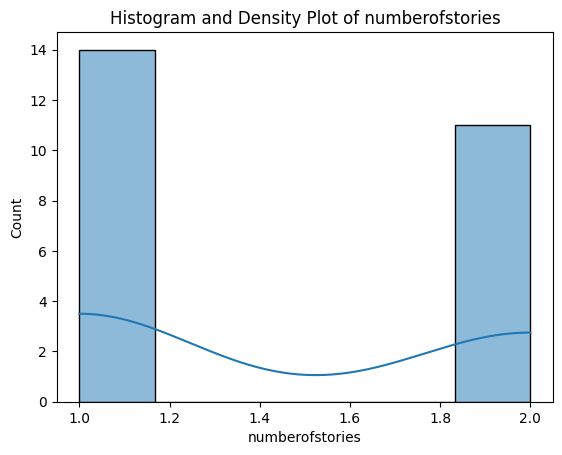

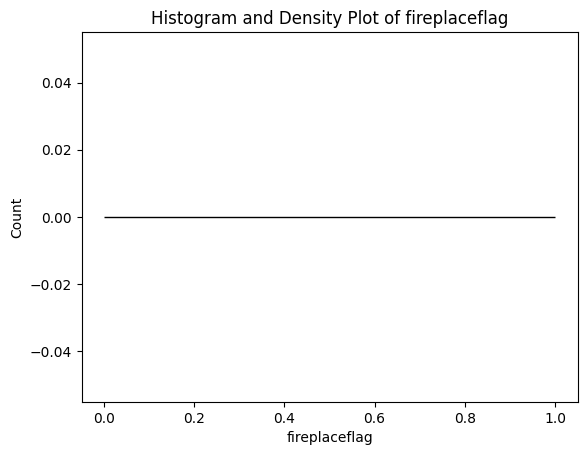

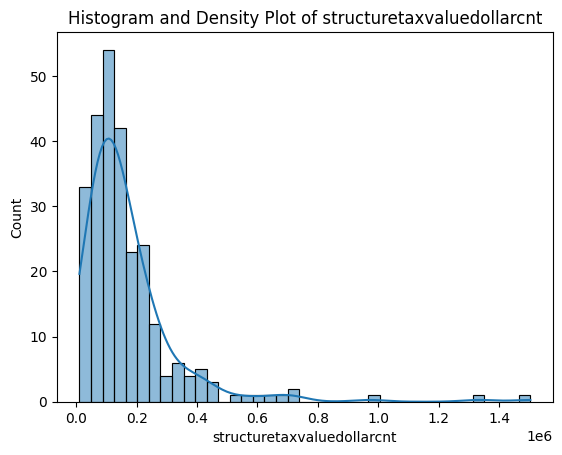

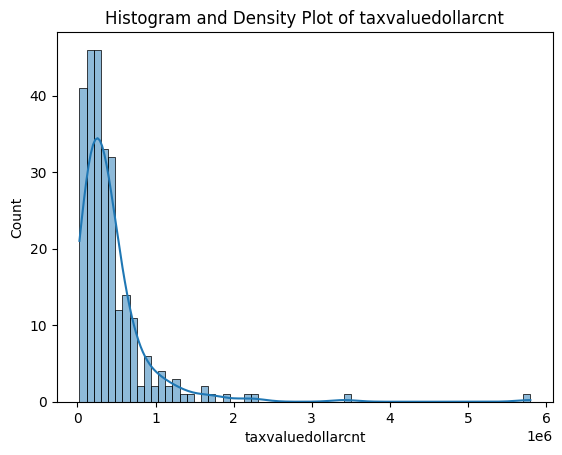

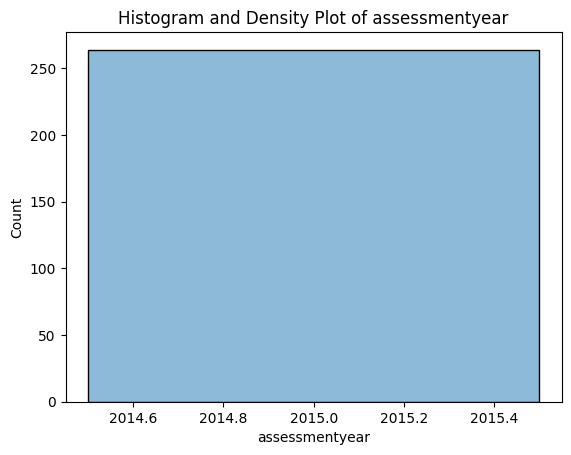

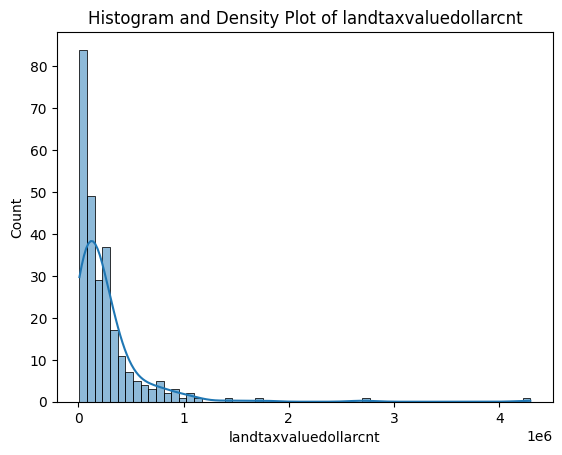

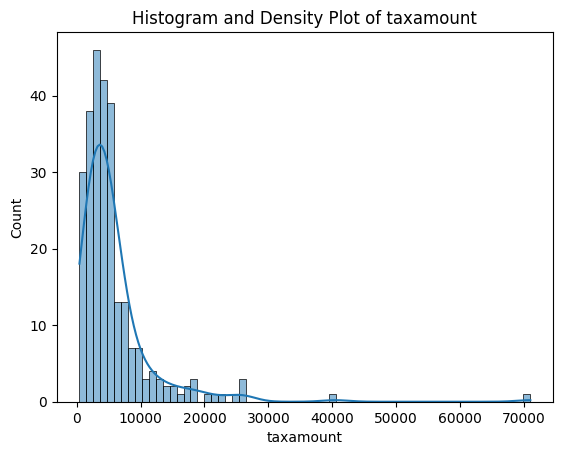

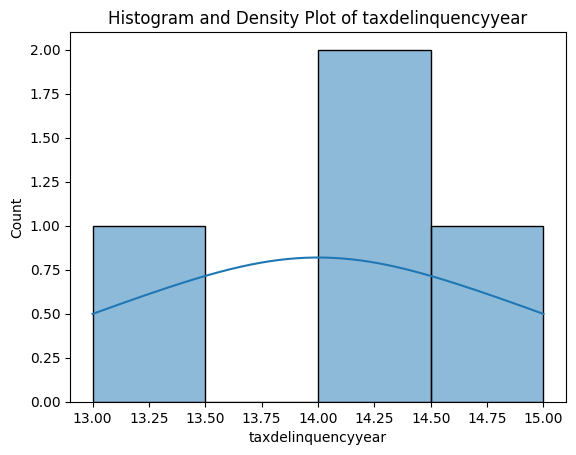

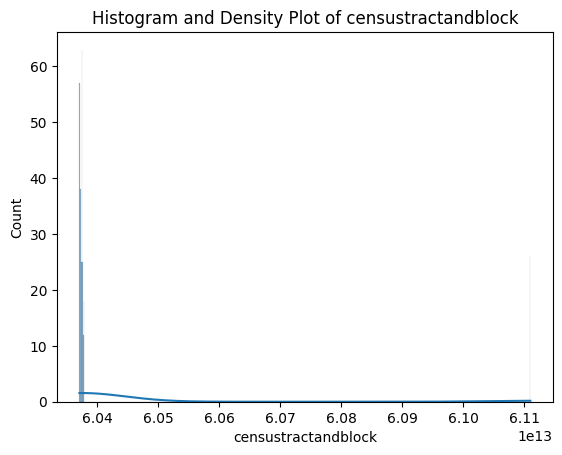

In [9]:
for col in train_df.select_dtypes(include=['number']).columns:
    sns.histplot(train_df[col],kde = True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

# Data Cleaning

### Dropping Duplicates

In [10]:
duplicate = train_df[train_df.duplicated('parcelid')]
duplicate.shape

(125, 60)

In [11]:
train_df.drop_duplicates(subset ="parcelid", keep = 'first', inplace = True)
train_df.shape

(90150, 60)

### Missing Value Check

In [12]:
miss_vals = train_df.isnull().sum()
print('Missing Value in Zillow Dataset:\n', miss_vals[miss_vals > 0])

Missing Value in Zillow Dataset:
 airconditioningtypeid           90069
architecturalstyletypeid        90150
basementsqft                    90150
bathroomcnt                     89886
bedroomcnt                      89886
buildingclasstypeid             90150
buildingqualitytypeid           89917
calculatedbathnbr               89889
decktypeid                      90147
finishedfloor1squarefeet        90125
calculatedfinishedsquarefeet    89886
finishedsquarefeet12            89905
finishedsquarefeet13            90150
finishedsquarefeet15            90131
finishedsquarefeet50            90125
finishedsquarefeet6             90150
fips                            89886
fireplacecnt                    90133
fullbathcnt                     89889
garagecarcnt                    90124
garagetotalsqft                 90124
hashottuborspa                  90149
heatingorsystemtypeid           89933
latitude                        89886
longitude                       89886
lotsizesquarefee

In [13]:
print("Total number of variables with missing value in the dataset: ", len(miss_vals))

Total number of variables with missing value in the dataset:  60


### Numerical and Categorical Variable Checks

In [14]:
numerical = [var for var in train_df.columns if train_df[var].dtypes!= 'O']
print("Total number of numerical variables in the dataset: ", len(numerical))
train_df[numerical].head()

Total number of numerical variables in the dataset:  56


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
categorical = [var for var in train_df.columns if train_df[var].dtypes == 'O']
print("Total number of categorical variables in the dataset: ", len(categorical))
train_df[categorical].head()

Total number of categorical variables in the dataset:  4


,hashottuborspa,propertycountylandusecode,propertyzoningdesc,taxdelinquencyflag
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


# Feature Engineering

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = train_props
df_copy = df.copy()
df.shape

(9999, 58)

In [17]:
df.isnull().mean()*100

parcelid                          0.000000
airconditioningtypeid            71.977198
architecturalstyletypeid        100.000000
basementsqft                     99.919992
bathroomcnt                       0.000000
bedroomcnt                        0.000000
buildingclasstypeid              99.389939
buildingqualitytypeid            13.141314
calculatedbathnbr                 3.830383
decktypeid                       99.259926
finishedfloor1squarefeet         91.309131
calculatedfinishedsquarefeet      0.740074
finishedsquarefeet12             10.481048
finishedsquarefeet13             99.479948
finishedsquarefeet15             90.789079
finishedsquarefeet50             91.309131
finishedsquarefeet6              99.989999
fips                              0.000000
fireplacecnt                     93.489349
fullbathcnt                       3.830383
garagecarcnt                     91.279128
garagetotalsqft                  91.279128
hashottuborspa                   99.129913
heatingorsy

In [18]:
def drop_cols(df):
    mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
    df[mis_var].isnull().sum()

    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped = [var for var in mis_var if df[var].isnull().sum() > limit]
    df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    return df

df = drop_cols(df_copy)
print('Shape of df after cleaning: ', df_copy.shape)
df.head()

Shape of df after cleaning:  (9999, 30)


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,NaN,6037,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,NaN,6037,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN
2,10843547,0.0,0.0,NaN,NaN,73026.0,NaN,6037,NaN,NaN,...,96095.0,0.0,2.0,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN
3,10859147,0.0,0.0,7.0,NaN,5068.0,NaN,6037,NaN,NaN,...,96424.0,0.0,NaN,1948.0,571346.0,1156834.0,2015,585488.0,14557.57,NaN
4,10879947,0.0,0.0,NaN,NaN,1776.0,NaN,6037,NaN,NaN,...,96450.0,0.0,1.0,1947.0,193796.0,433491.0,2015,239695.0,5725.17,NaN


In [19]:
def replace_data(df, mis_vars):
    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = replace_data(df, mis_var)
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,96337.0,0.0,1.0,1950.0,100000.0,9.0,2015,9.0,650.15,6.037139e+13
1,10759547,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,96337.0,0.0,1.0,1950.0,100000.0,27516.0,2015,27516.0,650.15,6.037139e+13
2,10843547,0.0,0.0,7.0,2.0,73026.0,1440.0,6037,2.0,2.0,...,96095.0,0.0,2.0,1950.0,650756.0,1413387.0,2015,762631.0,20800.37,6.037139e+13
3,10859147,0.0,0.0,7.0,2.0,5068.0,1440.0,6037,2.0,2.0,...,96424.0,0.0,1.0,1948.0,571346.0,1156834.0,2015,585488.0,14557.57,6.037139e+13
4,10879947,0.0,0.0,7.0,2.0,1776.0,1440.0,6037,2.0,2.0,...,96450.0,0.0,1.0,1947.0,193796.0,433491.0,2015,239695.0,5725.17,6.037139e+13


In [20]:
categorical = [var for var in df.columns if df[var].dtypes == 'O']

def encode_cat(df, cat_vars):    
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
        
    return df

df = encode_cat(df, categorical)
df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertycountylandusecode_labels,propertyzoningdesc_labels
0,10754147,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,1.0,1950.0,100000.0,9.0,2015,9.0,650.15,6.037139e+13,9,318
1,10759547,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,1.0,1950.0,100000.0,27516.0,2015,27516.0,650.15,6.037139e+13,7,375
2,10843547,0.0,0.0,7.0,2.0,73026.0,1440.0,6037,2.0,2.0,...,2.0,1950.0,650756.0,1413387.0,2015,762631.0,20800.37,6.037139e+13,44,304
3,10859147,0.0,0.0,7.0,2.0,5068.0,1440.0,6037,2.0,2.0,...,1.0,1948.0,571346.0,1156834.0,2015,585488.0,14557.57,6.037139e+13,44,304
4,10879947,0.0,0.0,7.0,2.0,1776.0,1440.0,6037,2.0,2.0,...,1.0,1947.0,193796.0,433491.0,2015,239695.0,5725.17,6.037139e+13,47,313
5,10898347,0.0,0.0,7.0,2.0,2400.0,1440.0,6037,2.0,2.0,...,1.0,1943.0,176383.0,283315.0,2015,106932.0,3661.28,6.037139e+13,47,306
6,10933547,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,1.0,1950.0,397945.0,554573.0,2015,156628.0,6773.34,6.037139e+13,15,304
7,10940747,0.0,0.0,7.0,2.0,3611.0,1440.0,6037,2.0,2.0,...,1.0,1946.0,101998.0,688486.0,2015,586488.0,7857.84,6.037139e+13,47,89
8,10954547,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,1.0,1950.0,100000.0,9.0,2015,9.0,650.15,6.037139e+13,9,92
9,10976347,0.0,0.0,7.0,2.0,3754.0,1440.0,6037,2.0,2.0,...,1.0,1978.0,218440.0,261201.0,2015,42761.0,4054.76,6.037139e+13,47,868


In [21]:
df['yeardifference'] = df['assessmentyear'] - df['yearbuilt']
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertycountylandusecode_labels,propertyzoningdesc_labels,yeardifference
0,10754147,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,1950.0,100000.0,9.0,2015,9.0,650.15,6.037139e+13,9,318,65.0
1,10759547,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,1950.0,100000.0,27516.0,2015,27516.0,650.15,6.037139e+13,7,375,65.0
2,10843547,0.0,0.0,7.0,2.0,73026.0,1440.0,6037,2.0,2.0,...,1950.0,650756.0,1413387.0,2015,762631.0,20800.37,6.037139e+13,44,304,65.0
3,10859147,0.0,0.0,7.0,2.0,5068.0,1440.0,6037,2.0,2.0,...,1948.0,571346.0,1156834.0,2015,585488.0,14557.57,6.037139e+13,44,304,67.0
4,10879947,0.0,0.0,7.0,2.0,1776.0,1440.0,6037,2.0,2.0,...,1947.0,193796.0,433491.0,2015,239695.0,5725.17,6.037139e+13,47,313,68.0


In [22]:
df.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)
df.shape

(9999, 29)

In [ ]:
df = df.drop('transactiondate',axis=1)
df.head()

In [24]:
df.to_csv('zillow_dataset.csv',index=False)

# Building the Model

In [25]:
# Importing Linear Regression models
import xgboost
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [26]:
zillow_df = pd.read_csv('./zillow_dataset.csv')
print(zillow_df.shape)
zillow_df.head()

(9999, 29)


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertyzoningdesc_labels,yeardifference
0,10754147,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,0.0,1.0,1950.0,100000.0,9.0,2015,9.0,650.15,318,65.0
1,10759547,0.0,0.0,7.0,2.0,1440.0,1440.0,6037,2.0,2.0,...,0.0,1.0,1950.0,100000.0,27516.0,2015,27516.0,650.15,375,65.0
2,10843547,0.0,0.0,7.0,2.0,73026.0,1440.0,6037,2.0,2.0,...,0.0,2.0,1950.0,650756.0,1413387.0,2015,762631.0,20800.37,304,65.0
3,10859147,0.0,0.0,7.0,2.0,5068.0,1440.0,6037,2.0,2.0,...,0.0,1.0,1948.0,571346.0,1156834.0,2015,585488.0,14557.57,304,67.0
4,10879947,0.0,0.0,7.0,2.0,1776.0,1440.0,6037,2.0,2.0,...,0.0,1.0,1947.0,193796.0,433491.0,2015,239695.0,5725.17,313,68.0


In [37]:
X = train_props.drop('logerror',axis = 1)
y = train_props['logerror']
print(X.shape, y.shape)

KeyError: "['logerror'] not found in axis"

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((67706, 2), (67706,), (22569, 2), (22569,))

In [33]:
train_vars = [var for var in X_train.columns if var not in ['parcelid', 'logerror']]
print('Length of Training Variables: ',len(train_vars))

scaler = StandardScaler()

scaler.fit(X_train[train_vars]) 

X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

Length of Training Variables:  1


In [34]:
X_train.head()

,parcelid,transactiondate
4816,11099562,-1.621910
78139,14321026,1.183452
4835,14410007,-1.621910
14666,12063924,-1.119283
19360,12375648,-0.920570
